In [3]:
# Import Libraries : 

# Python ≥3.8 is required
import sys
assert sys.version_info >= (3, )

# Scikit-Learn ≥1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Precision options
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.3f}'.format


1. Read DATA : 

In [4]:
filepath = os.path.abspath(os.path.join('..', 'data', 'UK_house_data.csv'))
print('File path: {}'.format(filepath))

housingData = pd.read_csv(filepath, dtype={'zipcode': str})

File path: c:\Users\sanji\Documents\Queens\End_to_End_Supervised_Learning\data\UK_house_data.csv


In [5]:
housingData.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.000,4,4.500,5420,101930,1.000,0,0,...,11,3890,1530,2001,0,98053,47.656,-122.005,4760,101930
6,1321400060,20140627T000000,257500.000,3,2.250,1715,6819,2.000,0,0,...,7,1715,0,1995,0,98003,47.310,-122.327,2238,6819
7,2008000270,20150115T000000,291850.000,3,1.500,1060,9711,1.000,0,0,...,7,1060,0,1963,0,98198,47.410,-122.315,1650,9711
8,2414600126,20150415T000000,229500.000,3,1.000,1780,7470,1.000,0,0,...,7,1050,730,1960,0,98146,47.512,-122.337,1780,8113
9,3793500160,20150312T000000,323000.000,3,2.500,1890,6560,2.000,0,0,...,7,1890,0,2003,0,98038,47.368,-122.031,2390,7570


In [6]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  object 
 17  lat            21613 non-null  float64
 18  long  

In [7]:
housingData.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,47.778,-121.315,6210.000,871200.000


2. Create a Training and Test Data Set : 

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
train_dat, test_dat = train_test_split(housingData, test_size= 0.2, random_state= 42)

In [10]:
train_dat.shape, test_dat.shape

((17290, 21), (4323, 21))

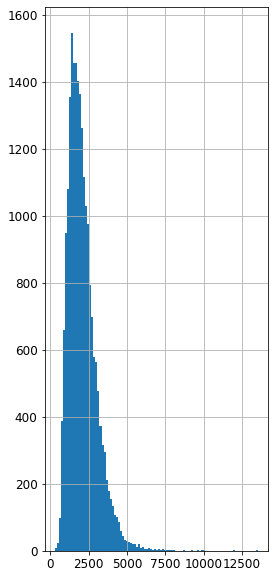

In [11]:
# Assuming "Sqft_Living" is an important feature in pricing the housing : So lets explore this feature first : 

housingData.sqft_living.hist(bins=  100, figsize =(4, 10))
plt.show()

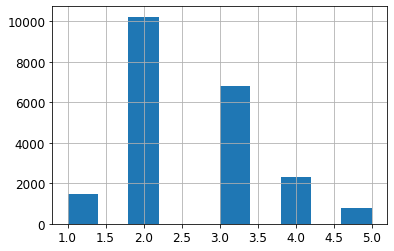

In [12]:
housingData["category_sqft_living"] = pd.cut(housingData.sqft_living, bins = [0., 1000.,2000., 3000., 4000., np.inf], labels = [1,2,3,4,5])

housingData["category_sqft_living"].hist()
plt.show()

In [13]:
housingData["category_sqft_living"].value_counts(dropna=False)

2    10218
3     6819
4     2299
1     1494
5      783
Name: category_sqft_living, dtype: int64

In [14]:
housingData["category_sqft_living"].value_counts(dropna=False)/ len(housingData)

2   0.473
3   0.316
4   0.106
1   0.069
5   0.036
Name: category_sqft_living, dtype: float64

In [15]:
# Alternate way of Spliting Data : 

from sklearn.model_selection import StratifiedShuffleSplit


In [16]:
data_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in data_splitter.split(housingData, housingData.category_sqft_living):
    strat_train_set  = housingData.loc[train_index]
    strat_test_set  = housingData.loc[test_index]

In [17]:
strat_train_set.shape, strat_test_set.shape

((17290, 22), (4323, 22))

In [18]:
strat_train_set.category_sqft_living.value_counts() / len(strat_train_set)

2   0.473
3   0.316
4   0.106
1   0.069
5   0.036
Name: category_sqft_living, dtype: float64

In [19]:
strat_test_set.category_sqft_living.value_counts() / len(strat_test_set)

2   0.473
3   0.316
4   0.106
1   0.069
5   0.036
Name: category_sqft_living, dtype: float64

In [20]:
for _ in (strat_train_set, strat_test_set):
    _.drop("category_sqft_living", axis = 1, inplace = True)

In [21]:
strat_train_set.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20474,993000315,20141002T000000,379000.000,3,3.250,1380,1234,3.000,0,0,...,8,1380,0,2006,0,98103,47.694,-122.342,1370,1282
3840,522059013,20140612T000000,173000.000,2,1.000,820,10450,1.000,0,0,...,7,820,0,1965,0,98055,47.426,-122.199,1240,11200
7426,2524000050,20141212T000000,1393000.000,3,3.500,4240,21578,2.000,0,0,...,10,3500,740,1994,0,98040,47.561,-122.215,3120,16440
4038,3277801450,20150415T000000,390000.000,4,1.000,1140,6250,1.500,0,0,...,6,1140,0,1958,0,98126,47.543,-122.375,1140,1370
11420,7202290320,20141024T000000,440500.000,3,2.500,1600,3172,2.000,0,0,...,7,1600,0,2002,0,98053,47.687,-122.042,1690,3698


In [22]:
strat_test_set.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2620,2624059036,20141003T000000,1599950.000,5,4.500,5130,43123,2.000,0,0,...,11,5130,0,1996,0,98006,47.544,-122.126,4670,43560
12950,120059044,20150217T000000,250000.000,3,1.750,1628,286355,1.000,0,0,...,7,1628,0,1996,0,98092,47.256,-122.122,1490,216344
8075,827000110,20140714T000000,308000.000,4,2.500,2330,4606,2.000,0,0,...,8,2330,0,2004,0,98031,47.393,-122.184,2330,5783
18162,2517010120,20150413T000000,340000.000,4,2.500,2450,6941,2.000,0,0,...,7,2450,0,2006,0,98042,47.401,-122.162,3300,6941
19739,4019500030,20141029T000000,450000.000,3,2.500,2280,4557,2.000,0,0,...,8,2280,0,2010,0,98028,47.773,-122.266,2070,4610


3. Inspect data by DATA VISUALIZATION : 

3.1 Outliers Detection : 

In [23]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 20474 to 1941
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  object 
 17  lat            17290 non-null  float64
 18  lon

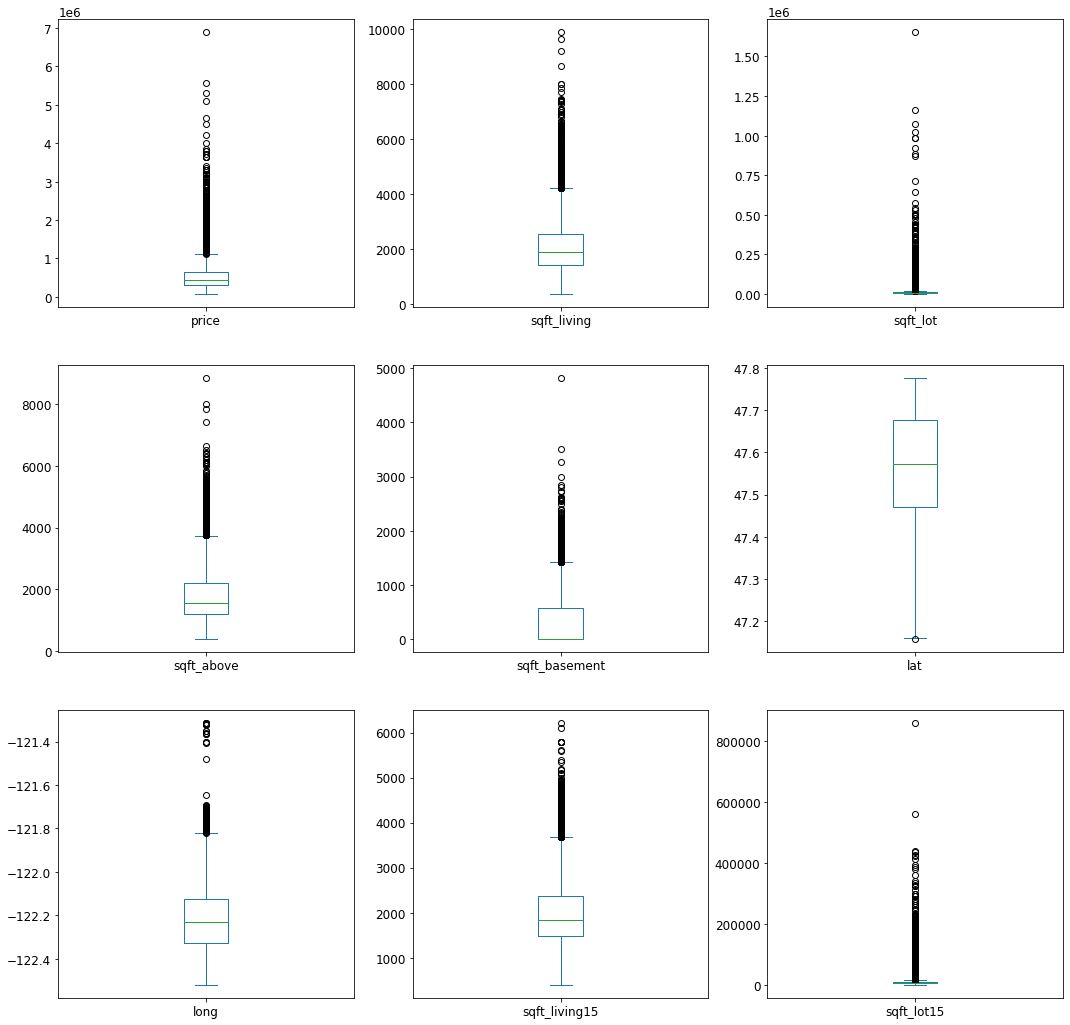

In [24]:
p = strat_train_set[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']].plot.box(subplots = True, layout = (3,3), figsize=(18,18))

<AxesSubplot:>

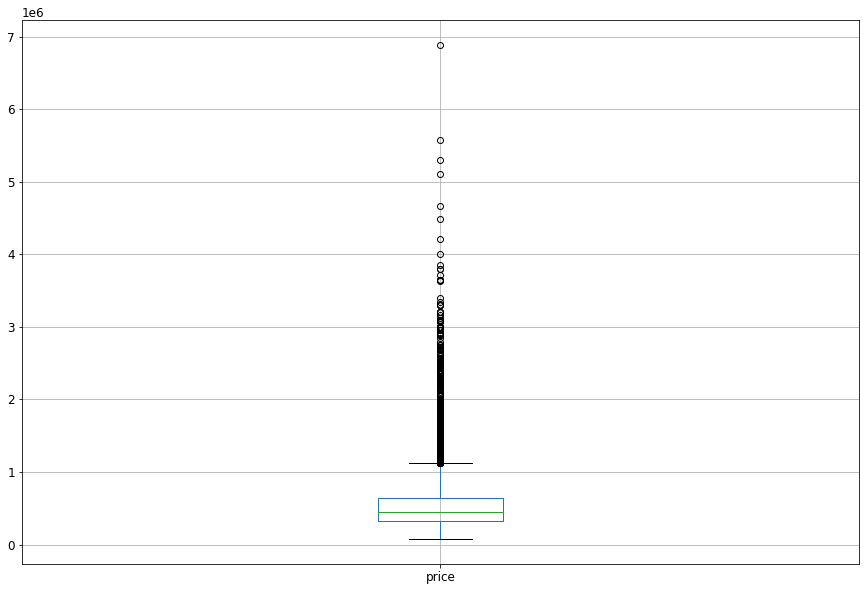

In [25]:
strat_train_set[['price']].boxplot(figsize= (15, 10))

Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.

Wikipedia Definition:
_The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, $IQR = Q_3 − Q_1$.

In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers._

If a data point is below $Q_1 - 1.5\times IQR$ or above $Q_3 + 1.5\times IQR$ then it's an outlier.

<b>Exercise 1:</b> Compute for me the count of outliers in our training set with respect to the `price` feature. (Hint: check the `DataFrame.quantile()` method and find a way to count the occurrences of values in a column of a DataFrame.) Additionally, write the code to remove those outliers. 

In [26]:
def detect_outlier(arr : np.array) ->np.array:

        upper_quartile_Q3 = np.quantile(arr, 0.75)
        lower_quartile_Q1 = np.quantile(arr, 0.25)
        iqr = upper_quartile_Q3 - lower_quartile_Q1
        upper_limit = upper_quartile_Q3 + 1.5*iqr
        lower_limit = lower_quartile_Q1 - 1.5*iqr
        print("Lower limit : " , lower_limit, "\n")
        print("Upper limit : " , upper_limit, "\n")
        is_outlier = np.logical_or(arr<lower_limit, arr > upper_limit)

        return is_outlier

In [27]:
price_outiers = strat_train_set[['price']]

In [28]:
mask = detect_outlier(price_outiers)
mask

Lower limit :  -162006.25 

Upper limit :  1127343.75 



,price
20474,False
3840,False
7426,True
4038,False
11420,False
...,...
14469,False
8505,False
549,False
4482,False


In [29]:
price_outiers[mask]

,price
20474,NaN
3840,NaN
7426,1393000.000
4038,NaN
11420,NaN
...,...
14469,NaN
8505,NaN
549,NaN
4482,NaN


In [30]:
print(np.where(mask == True))

(array([    2,    10,    31,    66,   104,   106,   124,   128,   129,
         180,   219,   230,   238,   243,   278,   297,   313,   353,
         365,   461,   469,   473,   506,   510,   515,   556,   565,
         574,   580,   606,   627,   638,   659,   672,   679,   683,
         693,   790,   793,   804,   840,   849,   888,   975,   983,
         993,   994,  1018,  1019,  1027,  1028,  1049,  1064,  1068,
        1071,  1093,  1095,  1101,  1107,  1108,  1132,  1169,  1170,
        1177,  1208,  1237,  1262,  1295,  1306,  1324,  1365,  1373,
        1433,  1439,  1445,  1462,  1511,  1513,  1515,  1529,  1541,
        1577,  1625,  1634,  1649,  1652,  1653,  1705,  1738,  1753,
        1757,  1777,  1793,  1834,  1837,  1856,  1858,  1864,  1890,
        1913,  1929,  1935,  1942,  1943,  1945,  1948,  1969,  2014,
        2018,  2020,  2025,  2031,  2048,  2153,  2166,  2173,  2187,
        2250,  2259,  2267,  2273,  2278,  2302,  2322,  2338,  2354,
        2390,  2404

In [31]:
print(np.unique(mask, return_counts=True, return_index=True))

(array([False,  True]), array([0, 2], dtype=int64), array([16367,   923], dtype=int64))


In [32]:
filtered_prices = price_outiers[~mask]
filtered_prices.shape

(17290, 1)

3.2 GEO Data Visualization  : 

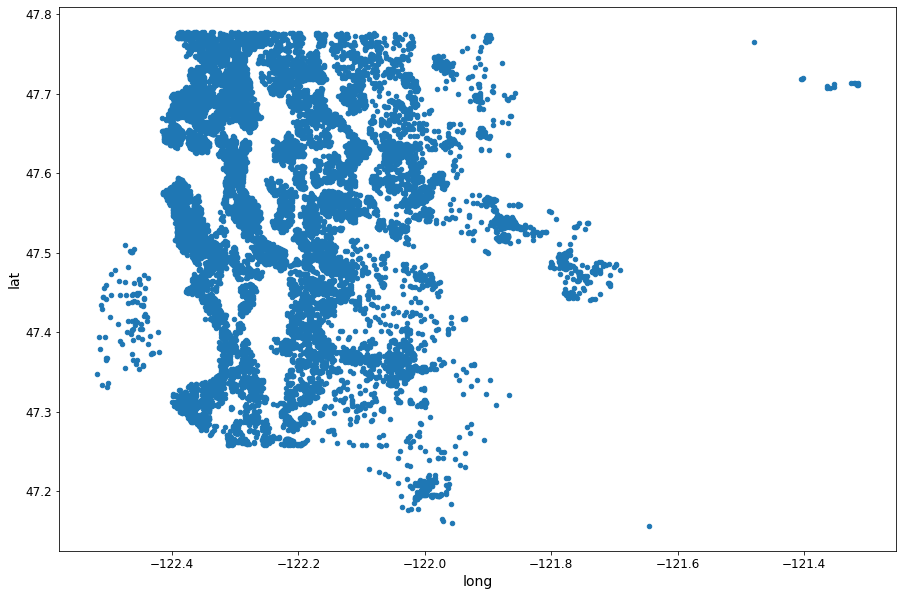

In [33]:
strat_train_set.plot( kind = "scatter", x= "long", y= "lat", figsize = (15,10))
plt.show()

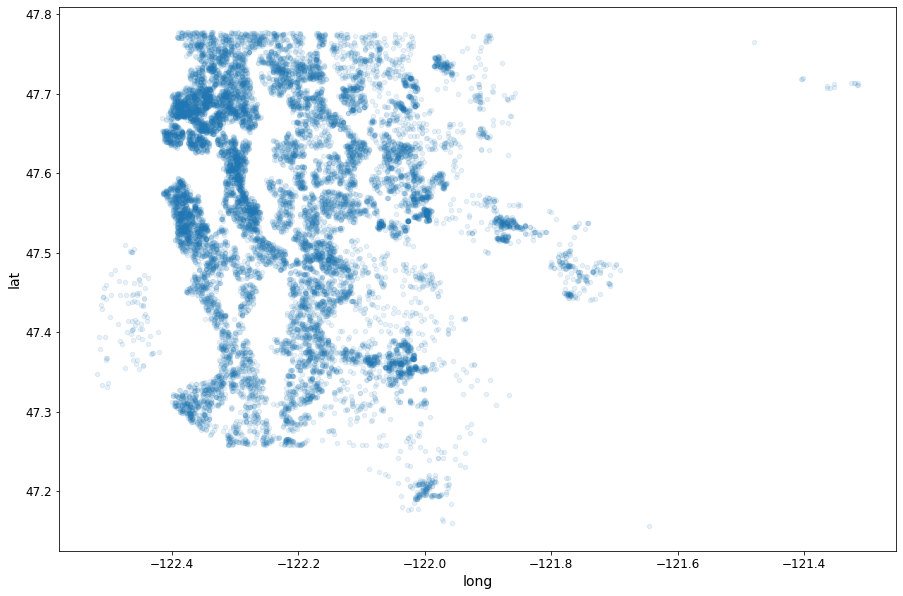

In [34]:
strat_train_set.plot( kind = "scatter", x= "long", y= "lat", alpha = 0.1,figsize = (15,10))
plt.show()

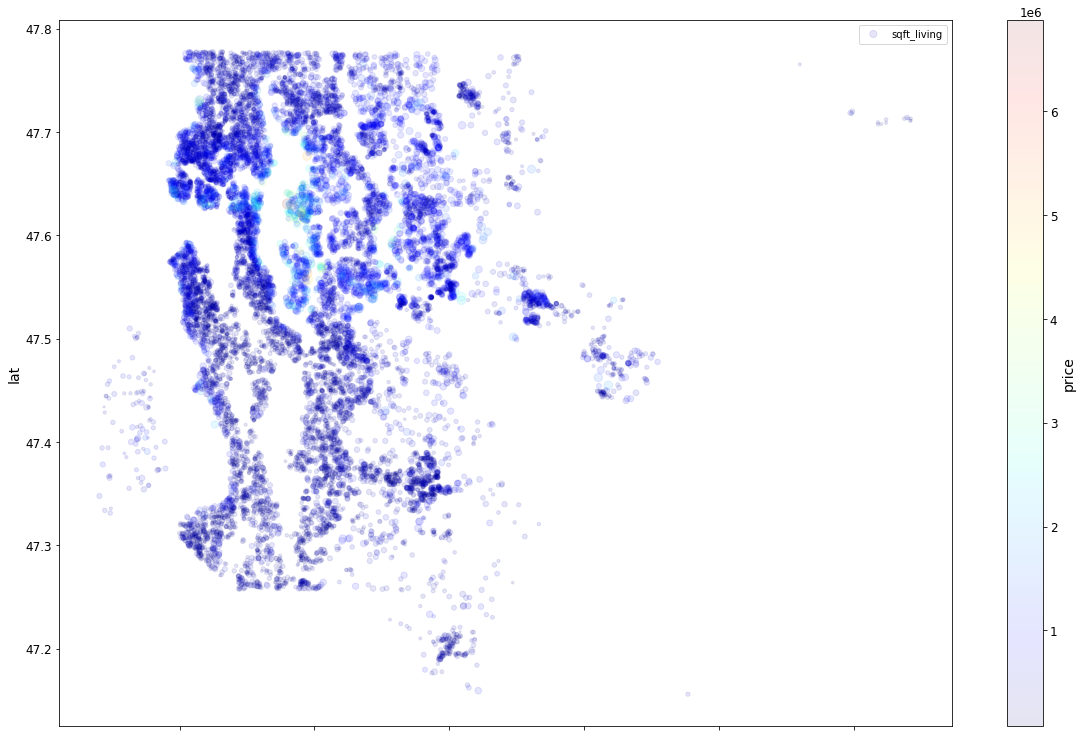

In [35]:
strat_train_set.plot(
    kind="scatter", x="long", y="lat", alpha=0.1, figsize=(20,13),
    s=strat_train_set["sqft_living"]/100, label="sqft_living",
    c="price", cmap=plt.get_cmap('jet'), colorbar=True
)
plt.legend()
plt.show()

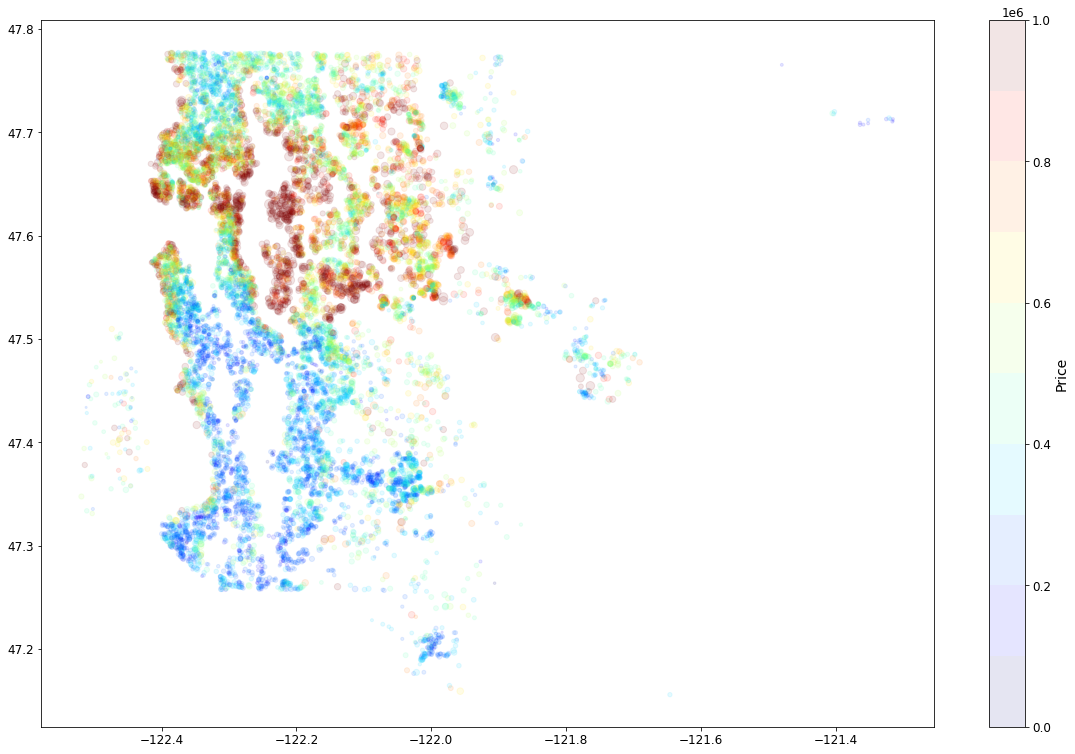

In [36]:
cmap = plt.cm.jet

bounds = np.linspace(0, 1e6, 11)

norm = mpl.colors.BoundaryNorm(
    bounds, # Monotonically increasing sequence of boundaries
    cmap.N  # Number of colors in the colormap to be used
)
plt.figure(figsize=(20, 13))
plt.scatter(
    x=strat_train_set["long"],
    y=strat_train_set["lat"],
    alpha=0.1,
    s=strat_train_set["sqft_living"]/100, # size of the dot
    label=strat_train_set["sqft_living"],
    c=strat_train_set["price"], # colour of the dot
    cmap=cmap, # colour map 
    norm=norm # used to scale the color data, c, in the range 0 to 1, in order to map into the colormap cmap
)

plt.colorbar(label="Price", orientation="vertical")
plt.show()



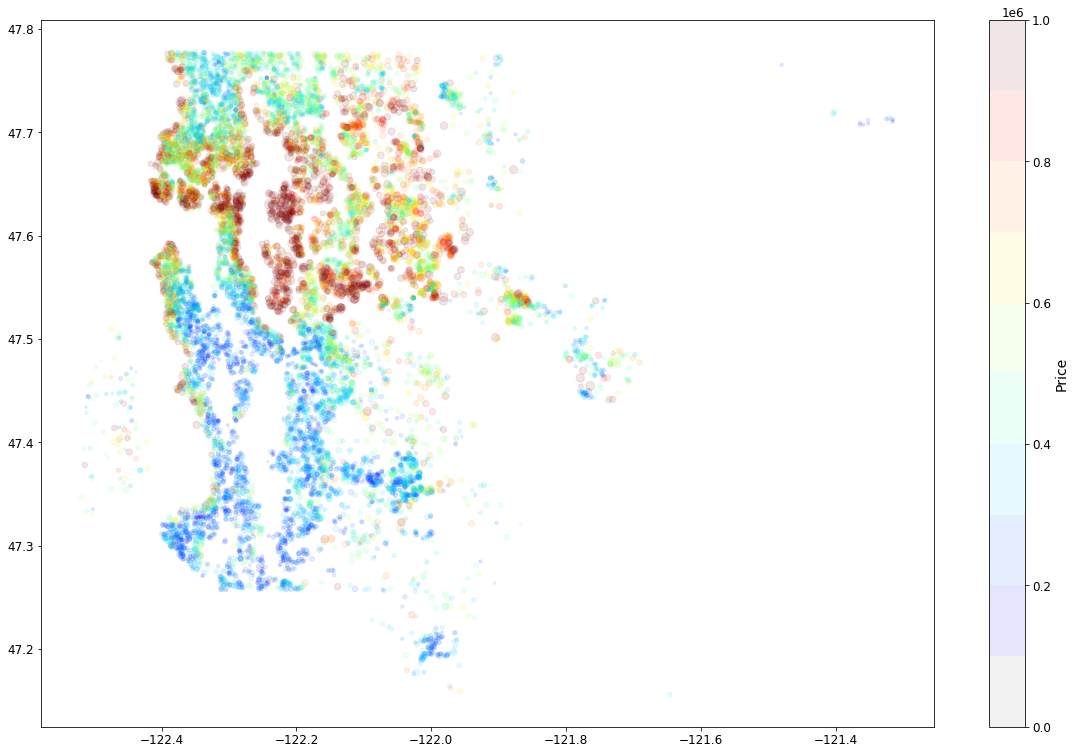

In [37]:
cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5, .5, .5, 1.0)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N
)

# define the bins and normalize
bounds = np.linspace(0, 1e6, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.figure(figsize=(20, 13))
plt.scatter(
    x=strat_train_set["long"],
    y=strat_train_set["lat"],
    alpha=0.1,
    s=strat_train_set["sqft_living"]/100,
    label=strat_train_set["sqft_living"],
    c=strat_train_set["price"],
    cmap=cmap, norm=norm
)
plt.colorbar(label="Price", orientation="vertical")
plt.show()

<b>Exercise 2:</b> explore on your own other ways to improve the graph above. You could look for ways to overlap it on top of the county map, or you could see if you can encode information differently

### 3.2 Looking for correlations

The dataset is not that big, and we can compute the standard correlation coefficient (Pearson’s r coefficient) between every two features using the `DataFrame.corr()` method:

In [38]:
corr_matrix = strat_train_set.corr()

In [39]:
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,1.000,-0.012,0.006,0.006,-0.009,-0.124,0.018,-0.006,0.014,-0.024,0.012,-0.007,-0.004,0.020,-0.016,0.003,0.023,0.004,-0.133
price,-0.012,1.000,0.308,0.524,0.702,0.091,0.260,0.260,0.391,0.037,0.674,0.605,0.320,0.060,0.114,0.308,0.025,0.589,0.089
bedrooms,0.006,0.308,1.000,0.510,0.573,0.031,0.170,-0.006,0.077,0.035,0.353,0.470,0.306,0.149,0.018,-0.010,0.128,0.390,0.026
bathrooms,0.006,0.524,0.510,1.000,0.754,0.087,0.500,0.062,0.178,-0.123,0.665,0.684,0.282,0.509,0.044,0.021,0.227,0.569,0.089
sqft_living,-0.009,0.702,0.573,0.754,1.000,0.166,0.354,0.101,0.281,-0.056,0.766,0.875,0.432,0.321,0.049,0.048,0.242,0.762,0.183
sqft_lot,-0.124,0.091,0.031,0.087,0.166,1.000,-0.005,0.023,0.075,-0.011,0.117,0.178,0.011,0.051,0.004,-0.082,0.227,0.140,0.696
floors,0.018,0.260,0.170,0.500,0.354,-0.005,1.000,0.024,0.023,-0.264,0.459,0.524,-0.247,0.489,0.005,0.054,0.126,0.282,-0.012
waterfront,-0.006,0.260,-0.006,0.062,0.101,0.023,0.024,1.000,0.412,0.020,0.083,0.069,0.080,-0.025,0.100,-0.019,-0.045,0.085,0.035
view,0.014,0.391,0.077,0.178,0.281,0.075,0.023,0.412,1.000,0.048,0.250,0.162,0.278,-0.053,0.105,-0.001,-0.076,0.282,0.076
condition,-0.024,0.037,0.035,-0.123,-0.056,-0.011,-0.264,0.020,0.048,1.000,-0.146,-0.159,0.179,-0.359,-0.058,-0.017,-0.106,-0.089,-0.006


In [42]:
corr_matrix['price'].sort_values(ascending=False)


price            1.000
sqft_living      0.702
grade            0.674
sqft_above       0.605
sqft_living15    0.589
bathrooms        0.524
view             0.391
sqft_basement    0.320
bedrooms         0.308
lat              0.308
waterfront       0.260
floors           0.260
yr_renovated     0.114
sqft_lot         0.091
sqft_lot15       0.089
yr_built         0.060
condition        0.037
long             0.025
id              -0.012
Name: price, dtype: float64

N.B. The correlation coefficient only measures linear correlations, and it may completely miss nonlinear correlation factors. 

Another way to check for correlation visually is to use the `scatter_matrix()` utility function offered by Pandas, which leverages `matplotlib`, or seaborn's `pairplot()` function.

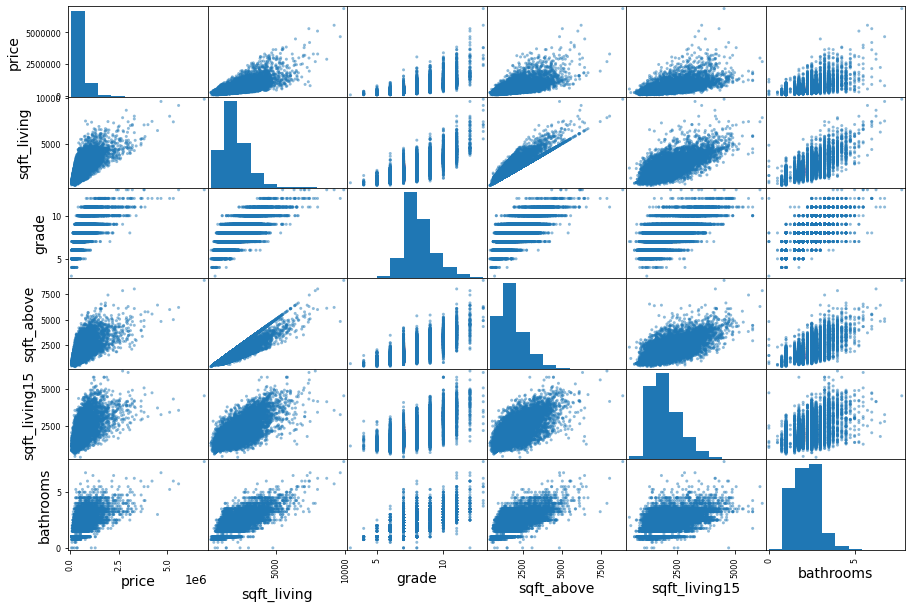

In [43]:
attributes = ["price", "sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms"]

pd.plotting.scatter_matrix(strat_train_set[attributes], figsize=(15, 10))
plt.show()

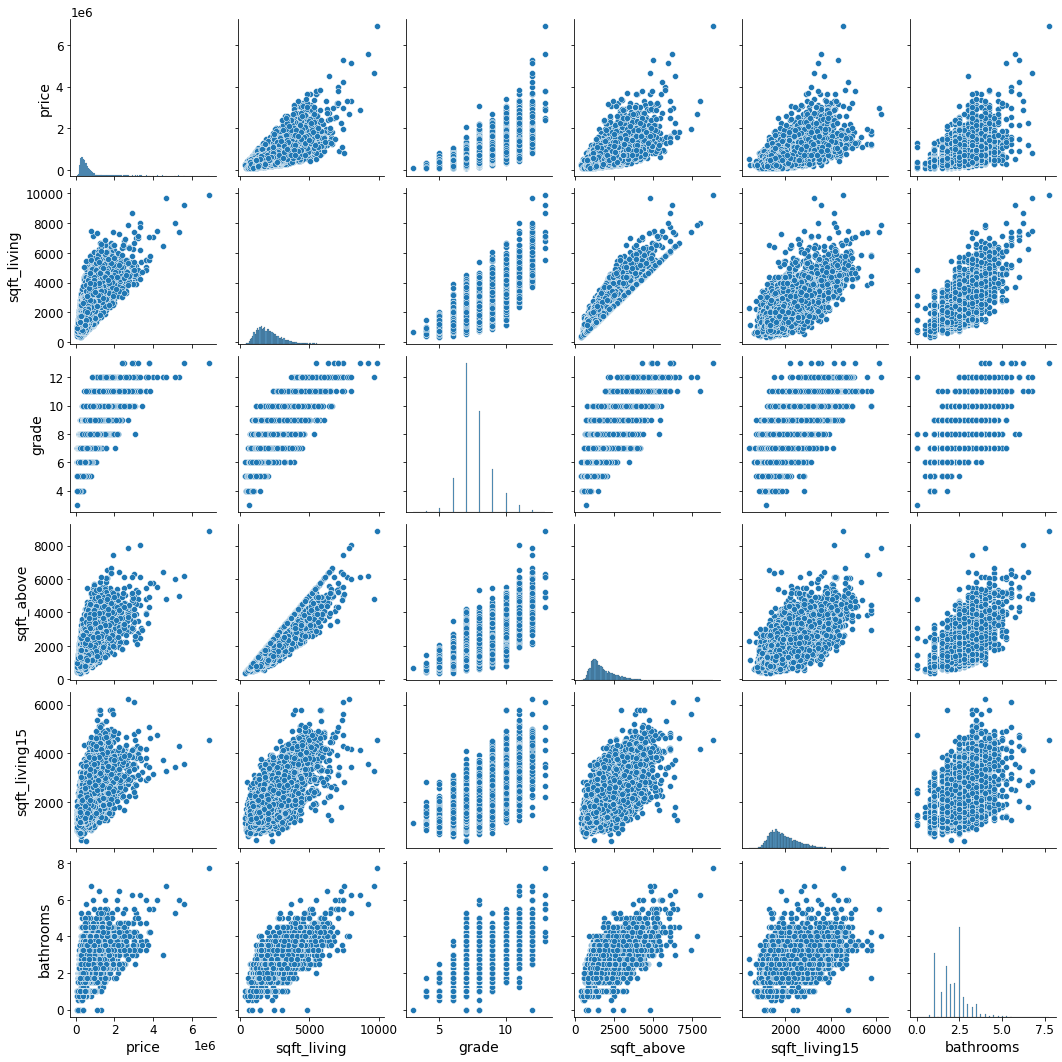

In [44]:
import seaborn as sns
ax = sns.pairplot(strat_train_set[attributes])

We can then start using boxplots or violinplots to further investigate targeted correlations, such as 'grade' vs 'price' or 'floors' vs 'price'.

<b>Exercise 3:</b> write a function that takes a categorical or ordinal feature as a first argument, the size of a figure as a second argument and plots, using seaborn, a set of boxplots of the price distribution for each category in the input categorical feature.

In [45]:

def print_boxplot(feature, figsize=(14, 6)):
    sns.set(rc={'figure.figsize':figsize})
    ax = sns.boxplot(x = feature, y = 'price', data = strat_train_set)


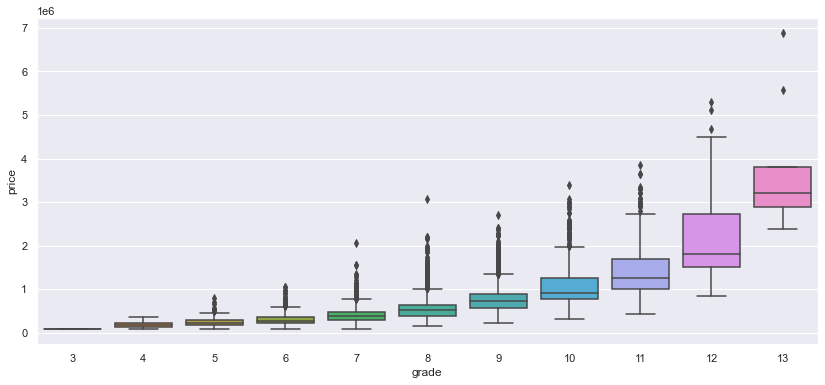

In [46]:
## plot 'grade' vs 'price'.
print_boxplot('grade')

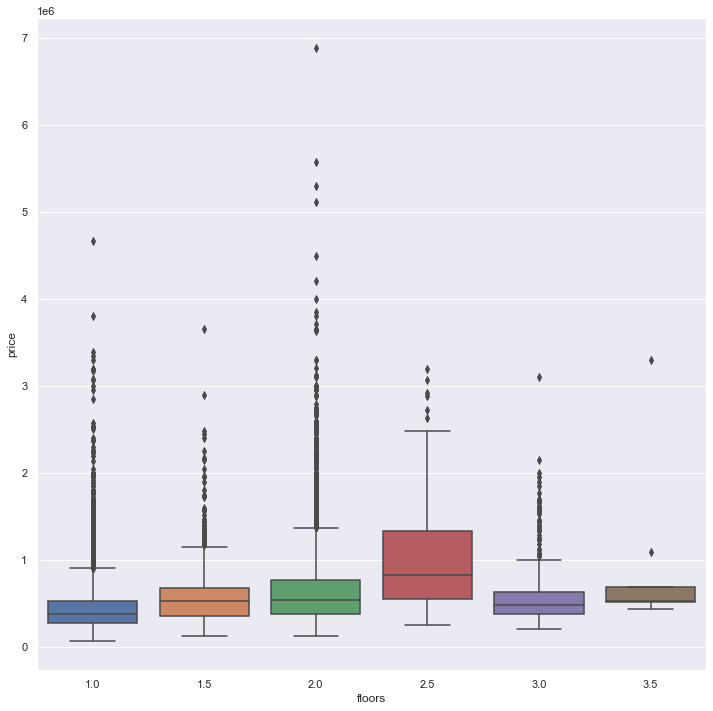

In [47]:
print_boxplot('floors', figsize=(12, 12))

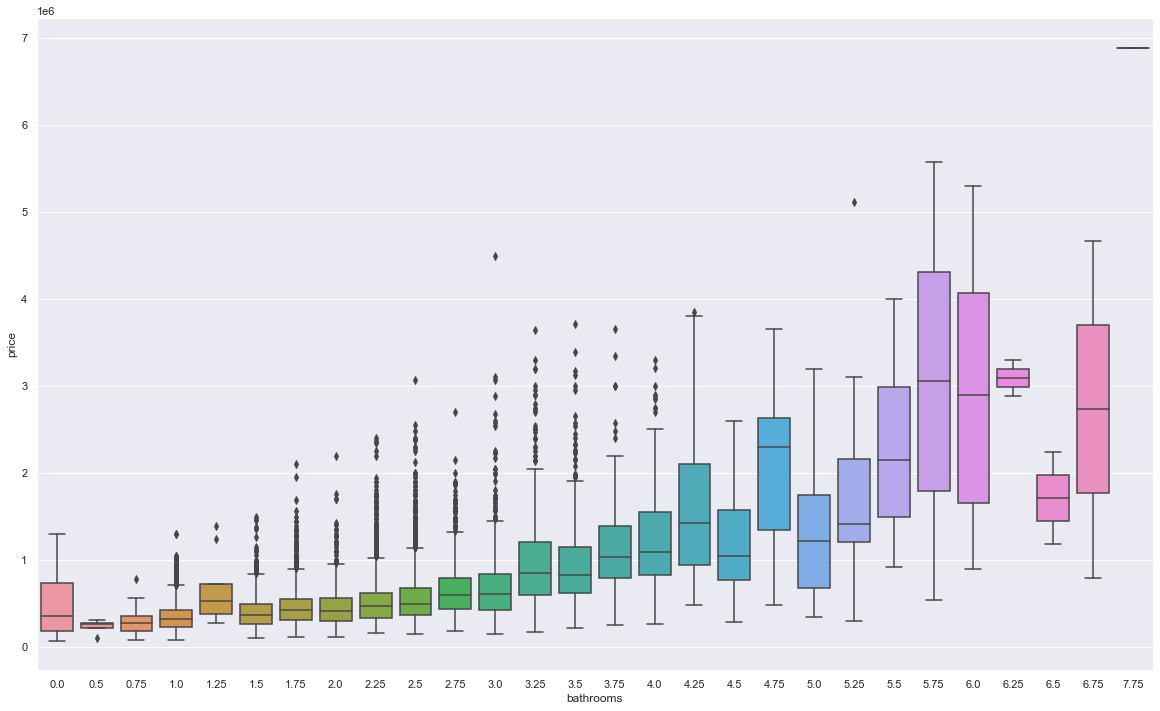

In [48]:
print_boxplot('bathrooms', figsize=(20, 12))

## 4. Preparing the Data for Machine Learning Algorithms

In [50]:
housing_features = strat_train_set.drop("price", axis=1)

housing_lable_y = strat_train_set["price"].copy()

In [51]:
housing_features.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20474,993000315,20141002T000000,3,3.250,1380,1234,3.000,0,0,3,8,1380,0,2006,0,98103,47.694,-122.342,1370,1282
3840,522059013,20140612T000000,2,1.000,820,10450,1.000,0,0,4,7,820,0,1965,0,98055,47.426,-122.199,1240,11200
7426,2524000050,20141212T000000,3,3.500,4240,21578,2.000,0,0,3,10,3500,740,1994,0,98040,47.561,-122.215,3120,16440
4038,3277801450,20150415T000000,4,1.000,1140,6250,1.500,0,0,3,6,1140,0,1958,0,98126,47.543,-122.375,1140,1370
11420,7202290320,20141024T000000,3,2.500,1600,3172,2.000,0,0,3,7,1600,0,2002,0,98053,47.687,-122.042,1690,3698


In [52]:
housing_lable_y.head()

20474    379000.000
3840     173000.000
7426    1393000.000
4038     390000.000
11420    440500.000
Name: price, dtype: float64

##### 4.1.1 Missing values and imputation

We can use `pd.DataFrame.isna()` or `pd.DataFrame.isnull()` to look for null or missing values in any of our variables/features.

NOTE: axis=1 performs the operation along the columns

In [55]:
## Look for rows with incomplete values

rows_with_null_values = housing_features[housing_features.isna().any(axis=1)]
rows_with_null_values

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In statistics, imputation is the process of replacing missing data with substituted values.
In scikit-learn we can use the `SimpleImputer` calss to perform imputation on missing  values. Generally we wil want to replace missing numeric (quantitative) values with the median value of that feature. For categorical features we may want to either use a "missing"/"unknown" category, use the mode, or drop the samples with missing values.

As there is no missing values in our dataset we would not really need to do this.

In [60]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing_features.select_dtypes(include=[np.number])
imputer.fit(housing_num)
imputer.statistics_

array([ 3.90e+09,  3.00e+00,  2.25e+00,  1.91e+03,  7.61e+03,  1.50e+00,
        0.00e+00,  0.00e+00,  3.00e+00,  7.00e+00,  1.56e+03,  0.00e+00,
        1.98e+03,  0.00e+00,  4.76e+01, -1.22e+02,  1.84e+03,  7.62e+03])

In [61]:
housing_num.median().values

array([ 3.90e+09,  3.00e+00,  2.25e+00,  1.91e+03,  7.61e+03,  1.50e+00,
        0.00e+00,  0.00e+00,  3.00e+00,  7.00e+00,  1.56e+03,  0.00e+00,
        1.98e+03,  0.00e+00,  4.76e+01, -1.22e+02,  1.84e+03,  7.62e+03])

In [62]:
X = imputer.transform(housing_num)


In [63]:
X

array([[ 9.93e+08,  3.00e+00,  3.25e+00, ..., -1.22e+02,  1.37e+03,
         1.28e+03],
       [ 5.22e+08,  2.00e+00,  1.00e+00, ..., -1.22e+02,  1.24e+03,
         1.12e+04],
       [ 2.52e+09,  3.00e+00,  3.50e+00, ..., -1.22e+02,  3.12e+03,
         1.64e+04],
       ...,
       [ 5.00e+09,  2.00e+00,  1.00e+00, ..., -1.22e+02,  1.19e+03,
         6.49e+03],
       [ 2.92e+09,  3.00e+00,  1.00e+00, ..., -1.22e+02,  1.34e+03,
         3.98e+03],
       [ 2.60e+09,  3.00e+00,  2.25e+00, ..., -1.22e+02,  2.69e+03,
         1.05e+04]])

In [65]:
housing_num.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [66]:
housing_features.index

Int64Index([20474,  3840,  7426,  4038, 11420, 12116, 14161, 21429, 17076,
             1345,
            ...
            12019, 14242,  5294, 12733, 18243, 14469,  8505,   549,  4482,
             1941],
           dtype='int64', length=17290)

In [67]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_features.index)
                          

In [68]:
housing_tr

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
20474,993000315.000,3.000,3.250,1380.000,1234.000,3.000,0.000,0.000,3.000,8.000,1380.000,0.000,2006.000,0.000,47.694,-122.342,1370.000,1282.000
3840,522059013.000,2.000,1.000,820.000,10450.000,1.000,0.000,0.000,4.000,7.000,820.000,0.000,1965.000,0.000,47.426,-122.199,1240.000,11200.000
7426,2524000050.000,3.000,3.500,4240.000,21578.000,2.000,0.000,0.000,3.000,10.000,3500.000,740.000,1994.000,0.000,47.561,-122.215,3120.000,16440.000
4038,3277801450.000,4.000,1.000,1140.000,6250.000,1.500,0.000,0.000,3.000,6.000,1140.000,0.000,1958.000,0.000,47.543,-122.375,1140.000,1370.000
11420,7202290320.000,3.000,2.500,1600.000,3172.000,2.000,0.000,0.000,3.000,7.000,1600.000,0.000,2002.000,0.000,47.687,-122.042,1690.000,3698.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,1254200835.000,4.000,1.750,2000.000,5100.000,1.000,0.000,0.000,4.000,7.000,1130.000,870.000,1949.000,0.000,47.680,-122.391,1540.000,5100.000
8505,1237500540.000,3.000,1.750,1370.000,10866.000,1.000,0.000,0.000,4.000,6.000,1370.000,0.000,1945.000,0.000,47.677,-122.164,1580.000,14250.000
549,5000500055.000,2.000,1.000,1320.000,8865.000,1.000,0.000,0.000,4.000,6.000,1320.000,0.000,1943.000,0.000,47.495,-122.300,1190.000,6490.000
4482,2919701944.000,3.000,1.000,1140.000,4560.000,1.000,0.000,0.000,4.000,6.000,770.000,370.000,1944.000,0.000,47.689,-122.362,1340.000,3980.000


In [69]:
housing_tr.loc[[14423, 1149, 6994]]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
14423,9543000205.000,0.000,0.000,844.000,4269.000,1.000,0.000,0.000,4.000,7.000,844.000,0.000,1913.000,0.000,47.278,-122.250,1380.000,9600.000
1149,3421079032.000,1.000,0.000,670.000,43377.000,1.000,0.000,0.000,3.000,3.000,670.000,0.000,1966.000,0.000,47.264,-121.906,1160.000,42882.000
6994,2954400190.000,0.000,0.000,4810.000,28008.000,2.000,0.000,0.000,3.000,12.000,4810.000,0.000,1990.000,0.000,47.664,-122.069,4740.000,35061.000


We might want to look for weird values as well...as it can be seen from the boxplotof bathrooms vs price some houses seem to have no bathroom. 
This is most likely an error and we may wont to replace those values with the median values for for bathrooms as well.

In [75]:
housing_tr.loc[housing_features['bathrooms']==0, 'bathrooms']

6994    NaN
1149    NaN
9854    NaN
9773    NaN
14423   NaN
3119    NaN
875     NaN
Name: bathrooms, dtype: float64

In [82]:
type(housing_features)

pandas.core.frame.DataFrame

In [72]:
housing_tr.loc[housing_features['bathrooms']==0, 'bathrooms'] =np.nan

In [76]:
housing_tr.bathrooms.isna().value_counts(dropna = False)

False    17283
True         7
Name: bathrooms, dtype: int64

In [77]:
housing_tr.loc[housing_features['bathrooms']==0, 'bathrooms']

6994    NaN
1149    NaN
9854    NaN
9773    NaN
14423   NaN
3119    NaN
875     NaN
Name: bathrooms, dtype: float64

In [78]:
housing_tr.bathrooms.fillna(housing_tr.bathrooms.median(), inplace=True)

In [79]:
housing_tr.loc[[14423, 1149, 6994]]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
14423,9543000205.000,0.000,2.250,844.000,4269.000,1.000,0.000,0.000,4.000,7.000,844.000,0.000,1913.000,0.000,47.278,-122.250,1380.000,9600.000
1149,3421079032.000,1.000,2.250,670.000,43377.000,1.000,0.000,0.000,3.000,3.000,670.000,0.000,1966.000,0.000,47.264,-121.906,1160.000,42882.000
6994,2954400190.000,0.000,2.250,4810.000,28008.000,2.000,0.000,0.000,3.000,12.000,4810.000,0.000,1990.000,0.000,47.664,-122.069,4740.000,35061.000


### 4.2 Transform Rows

It is always a good practice to write functions (or classes) to perform data transformations, so that these operations can later be performed in a reliable and reproducible way.

Below, we have a method that replaces zeroes with the median values for bathrooms, and splits the date the house was sold into `month_bought` and `yr_bought`, then computes the `age` (in years) of teh house when it was sold and introduces a boolean flag (`renovated_flag`) that states whether the house was renovated or not before being sold. It then removes features deemed not relevant (such as `id`, `date`, `yr_built`, `yr_bought`, `month_bought`, `yr_renovated`).

In [89]:
# housing_features['date'].apply(lambda:d : int(d[:4]))

# housing_features['date'][0][:4]
housing_features['yr_renovated'].value_counts()

0       16549
2014       71
2007       31
2003       29
2013       28
        ...  
1946        1
1951        1
1959        1
1934        1
1944        1
Name: yr_renovated, Length: 69, dtype: int64

In [84]:
housing_features.columns.values

array(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

In [94]:
def transform_housing_row(housing_df: pd.DataFrame) ->pd.DataFrame:
    """
    Data Clean Up
    """
    res = housing_df.copy()
    # housing with 0 bathrooms are a mistake, set them as null values :
    res.loc[housing_df['bathrooms']==0, 'bathrooms'] =np.nan
    # use median imputing for missing values in bathrooms
    res.bathrooms.fillna(res.bathrooms.median(), inplace=True)
    # split the acquisition date in year and month and compute the age of the house when bought
    if 'date' in res.columns.values:
        res['year_bought']=res['date'].apply(lambda d: int(d[:4]))
        res['month_bought']=res['date'].apply(lambda d: int(d[4:6]))
        res['age_of_house']= res['year_bought'] - res['yr_built']

    # create a boolean flag to see whether the house was renovated or not
    res['renovated_flag'] =  res['yr_renovated'].apply(lambda b : 0 if b==0.00 else 1)

    #drop not relevant columns :
    return res.drop(columns = ['id', 'date', 'year_bought', 'month_bought', 'yr_renovated', 'yr_built'], errors='ignore')
            

In [95]:
housing_processed = transform_housing_row(housing_features)
housing_processed

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age_of_house,renovated_flag
20474,3,3.250,1380,1234,3.000,0,0,3,8,1380,0,98103,47.694,-122.342,1370,1282,8,0
3840,2,1.000,820,10450,1.000,0,0,4,7,820,0,98055,47.426,-122.199,1240,11200,49,0
7426,3,3.500,4240,21578,2.000,0,0,3,10,3500,740,98040,47.561,-122.215,3120,16440,20,0
4038,4,1.000,1140,6250,1.500,0,0,3,6,1140,0,98126,47.543,-122.375,1140,1370,57,0
11420,3,2.500,1600,3172,2.000,0,0,3,7,1600,0,98053,47.687,-122.042,1690,3698,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,4,1.750,2000,5100,1.000,0,0,4,7,1130,870,98117,47.680,-122.391,1540,5100,65,0
8505,3,1.750,1370,10866,1.000,0,0,4,6,1370,0,98052,47.677,-122.164,1580,14250,69,0
549,2,1.000,1320,8865,1.000,0,0,4,6,1320,0,98168,47.495,-122.300,1190,6490,71,0
4482,3,1.000,1140,4560,1.000,0,0,4,6,770,370,98117,47.689,-122.362,1340,3980,70,0


### 4.2 Handling Text and Categorical Attributes

In general we can consider three types of text features: categorical, ordinal, and unstructured.
Unstructured text is more the subject of Natural Language Processing, hence we will not consider its processing/encoding at this stage (and we have no unstructured data). Ordinal data are text categories that imply and intrinsic order such as the set ("BAD", "AVERAGE", "GOOD", "VERY GOOD", "EXCELLENT"). These are generally encodes as integers ("BAD" => 0, "AVERAGE" => 1, "GOOD" => 2, "VERY GOOD" => 3, "EXCELLENT" => 4). These transformations can be handed with custom functions as above.

To handle Categorical Attributes that are not ordinal, a common solution is to create one binary attribute per category. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called *dummy attributes*. Scikit-Learn provides a `sklearn.preprocessing.OneHotEncoder` class to convert categorical values into one-hot vectors.

In our case we have the "zipcode" attribute that can be considered as categorical. Each "zipcode" category should become a mutually exclusive dummy attribute

<b>Exercise 4:</b> Use the `OneHotEncoder` class to encode each ZIP code as a separate category. Check the documentation for appropriate use of the `OneHotEncoder` transformer. What kind of output do you get? 

In [101]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(categories='auto')
housing_zipcode = housing_features[['zipcode']]
print(housing_zipcode)
housing_zipcode_OneHotEncoding = cat_encoder.fit_transform(housing_zipcode)

      zipcode
20474   98103
3840    98055
7426    98040
4038    98126
11420   98053
...       ...
14469   98117
8505    98052
549     98168
4482    98117
1941    98006

[17290 rows x 1 columns]


In [140]:
print(housing_zipcode_OneHotEncoding.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [104]:
cat_encoder.categories_

[array(['98001', '98002', '98003', '98004', '98005', '98006', '98007',
        '98008', '98010', '98011', '98014', '98019', '98022', '98023',
        '98024', '98027', '98028', '98029', '98030', '98031', '98032',
        '98033', '98034', '98038', '98039', '98040', '98042', '98045',
        '98052', '98053', '98055', '98056', '98058', '98059', '98065',
        '98070', '98072', '98074', '98075', '98077', '98092', '98102',
        '98103', '98105', '98106', '98107', '98108', '98109', '98112',
        '98115', '98116', '98117', '98118', '98119', '98122', '98125',
        '98126', '98133', '98136', '98144', '98146', '98148', '98155',
        '98166', '98168', '98177', '98178', '98188', '98198', '98199'],
       dtype=object)]

### 4.3 Custom Transformers (see if we should do this one)

You can define you own transformers creating a class that inherits both from `BaseEstimator` (so that it inherits the `.fit()` method) and the mixin class `TransformerMixin` (so that it acquires the `.tranform()` method)

Here below you can see a transformer that set two new features: `renovated_flag` and `age`.

Transformers can take DataFrames as inputs but always output NumPy arrays, so for some transformations where you find more convenient to work on DataFrame you might prefer just to write you own functions that return a modified DataFrame as we did with `transform_housing_rows()`

In [109]:
from sklearn.base import BaseEstimator, TransformerMixin

yr_built_ix = housing_features.columns.values.tolist().index('yr_built')
yr_renovated_ix = housing_features.columns.values.tolist().index('yr_renovated')
print(yr_built_ix, yr_renovated_ix)

13 14


In [120]:
# housing_features.info()

In [119]:
# age = 2017 - housing_features[:, yr_built_ix]
# age

# 2017 - housing_features.iloc[:, yr_built_ix]

In [134]:
class ManiputedAttributes(BaseEstimator, TransformerMixin):

    CURRENT_YEAR : int= 2017
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self #nothing else to do

    def transform(self, X):
        age = self.CURRENT_YEAR - X[:, yr_built_ix]
        renovated_flag = np.apply_along_axis(lambda r: 0 if r[yr_renovated_ix]==0 else 1, 1 , X)
        df = np.concatenate((X, age[:, np.newaxis], renovated_flag[:, np.newaxis]), axis = 1)
        return df




In [137]:
# add_attr = ManiputedAttributes()
# add_attr.transform(housing_num.values)

In [136]:
add_attr = ManiputedAttributes()
add_attributes_to_housing = pd.DataFrame( add_attr.transform(housing_num.values), columns=[*housing_num.columns.values.tolist(), 'age', 'is_renovated'], index=housing_num.index)

add_attributes_to_housing.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age,is_renovated
20474,993000315.000,3.000,3.250,1380.000,1234.000,3.000,0.000,0.000,3.000,8.000,1380.000,0.000,2006.000,0.000,47.694,-122.342,1370.000,1282.000,2017.000,1.000
3840,522059013.000,2.000,1.000,820.000,10450.000,1.000,0.000,0.000,4.000,7.000,820.000,0.000,1965.000,0.000,47.426,-122.199,1240.000,11200.000,2017.000,1.000
7426,2524000050.000,3.000,3.500,4240.000,21578.000,2.000,0.000,0.000,3.000,10.000,3500.000,740.000,1994.000,0.000,47.561,-122.215,3120.000,16440.000,2017.000,1.000
4038,3277801450.000,4.000,1.000,1140.000,6250.000,1.500,0.000,0.000,3.000,6.000,1140.000,0.000,1958.000,0.000,47.543,-122.375,1140.000,1370.000,2017.000,1.000
11420,7202290320.000,3.000,2.500,1600.000,3172.000,2.000,0.000,0.000,3.000,7.000,1600.000,0.000,2002.000,0.000,47.687,-122.042,1690.000,3698.000,2017.000,1.000
12116,520069032.000,3.000,1.750,1890.000,93218.000,1.000,0.000,0.000,4.000,7.000,1890.000,0.000,1964.000,0.000,47.257,-122.070,1690.000,172062.000,2017.000,1.000
14161,7660100085.000,5.000,2.750,2860.000,6000.000,2.500,0.000,0.000,4.000,8.000,2380.000,480.000,1902.000,0.000,47.591,-122.316,2240.000,6000.000,2017.000,1.000
21429,1139000062.000,3.000,2.500,1150.000,887.000,3.000,0.000,0.000,3.000,7.000,1150.000,0.000,2007.000,0.000,47.707,-122.356,1180.000,915.000,2017.000,1.000
17076,5351200280.000,4.000,2.500,2390.000,5071.000,2.000,0.000,0.000,3.000,9.000,1760.000,630.000,1988.000,0.000,47.614,-122.283,1940.000,5071.000,2017.000,1.000
1345,9301300751.000,3.000,1.500,1200.000,890.000,2.000,0.000,0.000,3.000,8.000,1030.000,170.000,2008.000,0.000,47.638,-122.342,1230.000,2120.000,2017.000,1.000


An alternative way to perform this transformation:

### 4.4 Feature Scaling

One of the most important transformations you need to apply to your data is feature scaling. In the great majority of case, Machine Learning algorithms will not perform well when the input numerical attributes have very different scales.

There are two common ways to get all attributes to have the same scale:
* min-max scaling:  rescaling the range of features to scale the range in [0, 1] or [−1, 1] (using scikit-learn `MinMaxScaler`)
* standardization: scales the data to have zero mean and variance = 1 (using scikit-learn `StandardScaler`).

### 4.5 Transformation Pipelines

We are goin to use a `StandardScaler` directly after our `ManipulatedAttributesAdder` class using a Tranformation Pipeline

In [141]:
housing_num.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000,17290.000
mean,4592511252.589,3.373,2.115,2079.757,14960.547,1.493,0.008,0.233,3.409,7.658,1787.130,292.627,1971.044,85.507,47.560,-122.214,1983.980,12647.374
std,2878747193.514,0.937,0.768,912.844,41658.782,0.539,0.088,0.763,0.650,1.180,824.641,442.167,29.390,404.116,0.138,0.141,684.765,26603.536
min,1000102.000,0.000,0.000,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,47.156,-122.519,399.000,651.000
25%,2124054210.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,47.470,-122.329,1480.000,5100.000
50%,3904990345.000,3.000,2.250,1910.000,7610.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,47.571,-122.231,1840.000,7620.000
75%,7312400078.750,4.000,2.500,2550.000,10697.750,2.000,0.000,0.000,4.000,8.000,2210.000,570.000,1997.000,0.000,47.678,-122.125,2360.000,10118.000
max,9900000190.000,33.000,7.750,9890.000,1651359.000,3.500,1.000,4.000,5.000,13.000,8860.000,4820.000,2015.000,2015.000,47.778,-121.315,6210.000,858132.000


In [142]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipline = Pipeline([('imputer', SimpleImputer(strategy ="median")), ('std_scaler', StandardScaler())])




In [143]:
num_pipline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

In [144]:
housing_num_tr = transform_housing_row(housing_num)
housing_num_tr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,renovated_flag
20474,3,3.250,1380,1234,3.000,0,0,3,8,1380,0,47.694,-122.342,1370,1282,0
3840,2,1.000,820,10450,1.000,0,0,4,7,820,0,47.426,-122.199,1240,11200,0
7426,3,3.500,4240,21578,2.000,0,0,3,10,3500,740,47.561,-122.215,3120,16440,0
4038,4,1.000,1140,6250,1.500,0,0,3,6,1140,0,47.543,-122.375,1140,1370,0
11420,3,2.500,1600,3172,2.000,0,0,3,7,1600,0,47.687,-122.042,1690,3698,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,4,1.750,2000,5100,1.000,0,0,4,7,1130,870,47.680,-122.391,1540,5100,0
8505,3,1.750,1370,10866,1.000,0,0,4,6,1370,0,47.677,-122.164,1580,14250,0
549,2,1.000,1320,8865,1.000,0,0,4,6,1320,0,47.495,-122.300,1190,6490,0
4482,3,1.000,1140,4560,1.000,0,0,4,6,770,370,47.689,-122.362,1340,3980,0


In [145]:
housing_num_prepared = num_pipline.fit_transform(housing_num_tr)
housing_num_prepared.shape

(17290, 16)

In [146]:
housing_num_prepared

array([[-0.4 ,  1.48, -0.77, ..., -0.9 , -0.43, -0.21],
       [-1.47, -1.46, -1.38, ..., -1.09, -0.05, -0.21],
       [-0.4 ,  1.81,  2.37, ...,  1.66,  0.14, -0.21],
       ...,
       [-1.47, -1.46, -0.83, ..., -1.16, -0.23, -0.21],
       [-0.4 , -1.46, -1.03, ..., -0.94, -0.33, -0.21],
       [-0.4 ,  0.17,  1.41, ...,  1.03, -0.08, -0.21]])

In [147]:
housing_num_prepared.min(axis=1), housing_num_prepared.max(axis=1)

(array([-0.91, -1.47, -0.63, ..., -1.47, -1.46, -0.66]),
 array([2.79, 0.91, 2.37, ..., 0.91, 0.93, 2.32]))

Until now, we have handled the categorical columns and the numerical columns separately. It would be more convenient if we had just one transformer capable to handle all columns, applying the appropriate transformations to each column. Solution: we can use scikit-learn `ColumnTransformer`!

<b>Exercise 5:</b> Use the `sklearn.compose.ColumnTransformer` class to create a pipeline that processes separately the numeric/quantitative attributes (using the `num_pipeline` that we have defined above) and the Categorical Attribute `zipcode` using a one-hot-encoding without scaling. The binary attributes should remain unmodified

Hint: check the `ColumnTransformer` API: https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html